# Laboratorio 3: Clasificación (Parte 1)

## Parte 1: Evaluar un clasificador

Primero cargamos las librerías y los datos necesarios para este laboratorio:

In [89]:
## ejecutar este bloque para cargar las librerías
import csv
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.utils import shuffle

from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from sklearn import cross_validation

Usaremos el Iris Dataset, que viene en `scikit-learn`:

In [90]:
## ejecutar este bloque

# comma delimited is the default
data = pd.read_csv("Data.csv", header = 0)
target = pd.read_csv("Target.csv", header = 0)

# put the original column names in a python list
original_headers_data = list(data.columns.values)


# create a numpy array with the numeric values for input into scikit-learn
data = data.as_matrix()
target = np.ravel(target.as_matrix())
target = np.asarray(target, dtype="|S6")

print("Data:\n", data[:5])
print("Target:\n", target[:5], target[95:100], target[-5:])

('Data:\n', array([[ 123, 1916],
       [ 151, 1925],
       [ 145, 1927],
       [ 110, 1929],
       [ 100, 1929]], dtype=int64))
('Target:\n', array(['8.0', '8.3', '8.3', '8.0', '6.3'], 
      dtype='|S6'), array(['6.8', '6.7', '7.8', '7.7', '7.8'], 
      dtype='|S6'), array(['4.6', '3.5', '8.5', '3.4', '4.9'], 
      dtype='|S6'))


Podemos ver que los datos de entrenamiento son tuplas de 4 dimensiones, mientras que la clase de cada dato corresponde a un valor 0, 1 o 2. En el campo `DESCR` de la variable `iris` están los detalles del dataset.

In [49]:
# ejecutar este bloque para ver el contenido de DESCR
# print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Si ejecutamos el bloque anterior, podemos ver que el dataset consiste en 150 observaciones y 3 clases, donde cada observación corresponde a 4 características de una flor, sus dimensiones, mientras que la clase corresponde a la especie de la flor (iris-setosa, iris-virginica e iris-versicolor).

Para evaluar un clasificador, típicamente tenemos 3 formas:

1. Entrenamos con los *datos de entrenamiento*, y evaluamos el clasificador en los *datos de entrenamiento*.
2. Antes de entrenar, separamos nuestros datos en *datos de entrenamiento* y *datos de prueba*. Entrenamos sobre el primer conjunto y evaluamos el rendimiento del clasificador sobre el segundo.
3. Usamos el paso (2), pero separando los datos muchas veces y entrenando y evaluando sobre un conjunto distinto cada vez. Esta forma es llamada *cross-validation*.

Llamaremos indistintamente a los *datos de entrenamiento* como el *Training set* y a los *datos de prueba* como el *Test set*.

## Pregunta 1

Vamos a usar el clasificador K-NN (K-Nearest Neighbors), usando distintas formas de evaluación, y vamos a compararlas mediante el Accuracy o Exactitud.

### (1) Training Set

A continuación vamos a entrenar un clasificador K-NN con todos los datos que tenemos disponibles.

In [91]:
## ejecutar este código

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

El método `knn.predict(...)` determina la clase de los datos entregados como parámetro. 

Por ejemplo si ejecutáramos ```knn.predict([[1.0, 2.0, 3.0, 1.0]])```, le estamos pasando al clasificador un dato con valores `[1.0, 2.0, 3.0, 1.0]`. Al ejecutar `predict`, éste nos retornará un arreglo con el valor `0`, indicando que esos datos fueron clasificados como la clase `0`.

**Modifique el código a continuación para determinar el Accuracy del clasificador probando sobre todos los datos de entrenamiento.**

### Respuesta (1):

In [92]:
### COMPLETAR ACÁ

target_pred = knn.predict(data)
accuracy_score(target, target_pred)

print(classification_report(target, target_pred))

             precision    recall  f1-score   support

        1.6       0.33      1.00      0.50         1
        1.7       0.17      1.00      0.29         1
        1.9       0.14      0.50      0.22         2
        2.0       0.15      1.00      0.27         2
        2.1       0.16      1.00      0.27         3
        2.2       0.14      1.00      0.25         1
        2.3       0.50      0.33      0.40         3
        2.4       0.17      1.00      0.29         2
        2.5       0.14      1.00      0.25         1
        2.6       0.17      1.00      0.29         1
        2.7       0.25      0.60      0.35         5
        2.8       0.14      0.80      0.24         5
        2.9       0.11      0.33      0.17         3
        3.0       0.19      1.00      0.32         3
        3.1       0.18      0.75      0.29         4
        3.2       1.00      1.00      1.00         1
        3.3       0.18      0.64      0.29        11
        3.4       0.21      0.50      0.30   

### (2) Test Set

La función `cross_validation.train_test_split(X, y, test_size=p, random_state=N)` divide los arreglos `X` e `y` en dos arreglos, haciendo un muestreo de sus datos de forma consistente para generar un dataset de entrenamiento y otro de pruebas; `test_size` indica la fracción del total para asignar el tamaño del conjunto de pruebas. El parámetro `random_state` sirve para tener resultados consistentes tras cada ejecución.


In [39]:
## ejecutar este código

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.33, random_state=37)

**Escriba el código necesario para determinar el Accuracy del clasificador, esta vez entrenando sobre el Training set y probando sobre el Test set.**

### Respuesta (2):

In [40]:
### COMPLETAR ACÁ

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       1.00      0.93      0.96        14
          2       0.95      1.00      0.97        19

avg / total       0.98      0.98      0.98        50



### (3) Cross-validation

Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.


In [41]:
## ejecutar este código

cross_validation.cross_val_score(knn, X, y, cv=5)

array([ 0.96666667,  1.        ,  0.93333333,  0.96666667,  1.        ])

El código anterior va a realizar 5-fold cross-validation usando el clasificador K-NN sobre los datos. Después se puede tomar el promedio y el intervalo de confianza de los resultados para tener otra medida de rendimiendo del clasificador. 

(Por defecto, `cross_val_score` llama al método `score` del clasificador, el cual en este caso es el Accuracy. Es posible cambiar la métrica en los parámetros de `cross_val_score`.)

**¿Por qué es necesario usar cross-validation? O bien, ¿en qué casos cree que es mejor que sólo separar los datos en Training Set y Test Set?**

Para ilustrar el problema, pruebe cambiando el valor del parámetro `random_state` en el siguiente código y determine el Accuracy del clasificador resultante con cada valor de `random_state` escogido:

In [42]:
## modificar acá

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.33, random_state=75)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.33, random_state=715)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.90      0.95        20
          2       0.88      1.00      0.93        14

avg / total       0.96      0.96      0.96        50

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       0.94      0.94      0.94        18
          2       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        50



### Respuesta (3):

Es necesario usar Cross-Validation debido a que los resultados de accuracy para cada predicción pueden variar dependiendo de la random seed que se use. En este sentido, es más confiable realizar la predicción varias veces con distinta random seed y utilizar un promedio o determinar un error asociado que nos puede informar de situaciones de overfitting por ejemplo. 

## Pregunta 2

Imagine que tenemos un dataset sobre el cual queremos entrenar un buen clasificador. Para esto, usamos cross-validation como forma de evaluación. Usamos cientos, miles de distintos modelos sobre nuestros datos, hasta encontrar el modelo que obtenga los mejores resultados sobre el dataset. ¿Qué se puede esperar en términos de rendimiento al aplicar el modelo final sobre datos no vistos anteriormente? ¿Cómo asocia esta situación al Overfitting? Proponga una mejor forma de estimar el rendimiento del modelo final.

### Respuesta:

En primer lugar, si se usan demasiados modelos sobre los datos, es decir, se hace cross validation demasiadas veces, además de afectar el rendimiento global del clasificador ya que se está ejecutando muchas veces, se pierde la credibilidad de éste debido a que se produce overfitting puesto que puede que el modelo se esté ajustando demasiado a un caso en específico. Idealmente, hay que evitar el Underfitting y el Overfitting, buscando un punto intermedio entre estos. Es decir, no hay que hacer ni muy pocas iteraciones ni demasiadas. Una buena forma de estimar un buen rendimiento, es verificar el porcentaje de error en el Test Set al clasficar. Si luego de n iteraciones del cross validation este porcentaje empieza a aumentar, entonces ya se hicieron suficientes iteraciones y se tiene un modelo decente.

## Parte 2: Métricas de evaluación

## Pregunta 3

**(a)** Dada la siguiente matriz de confusión, determine **Accuracy**, **Precision**, **Recall**, $F_{1}$ **-score** por cada clase, y cantidad de **Falsos Positivos** y **Falsos Negativos**. Puede escribir un código que entregue la respuesta, o sólo escribir cómo llegó al resultado, además de la respuesta.

| A  | B  | C  | ← clasificado como / clase real ↓ |
|:----:|:----:|:----:|--------------------:|
| 21 | 2  | 4  |              **A** |
| 0  | 7  | 2  |              **B** |
| 2  | 15 | 27 |              **C** |

### Respuesta (a)

In [46]:
def precision(TP, FP):
    return TP/(TP+FP)
    
def recall(TP, FN):
    return TP/(TP+FN)
    
def F1(TP, FP, FN):
    return 2*(precision(TP, FP))*(recall(TP, FN))/((precision(TP, FP))+(recall(TP, FN)))
    
def accuracy(corr, tot):
    return corr/tot

print("Clase A:" + "\n" + "Accuracy = " + str(accuracy(72., 80.)) + "\n" +
     "Precision = " + str(precision(21., 2.)) + "\n" + 
     "Recall = " + str(recall(21., 6.)) + "\n" +
     "F1-Score = " + str(F1(21., 2., 6.)) + "\n")

print("Clase B:" + "\n" + "Accuracy = " + str(accuracy(61., 80.)) + "\n" +
     "Precision = " + str(precision(7., 17.)) + "\n" + 
     "Recall = " + str(recall(7., 2.)) + "\n" +
     "F1-Score = " + str(F1(7., 17., 2.)) + "\n")

print("Clase C:" + "\n" + "Accuracy = " + str(accuracy(57., 80.)) + "\n" +
     "Precision = " + str(precision(27., 6.)) + "\n" + 
     "Recall = " + str(recall(27., 17.)) + "\n" +
     "F1-Score = " + str(F1(27., 6., 17.)) + "\n")


Clase A:
Accuracy = 0.9
Precision = 0.913043478261
Recall = 0.777777777778
F1-Score = 0.84

Clase B:
Accuracy = 0.7625
Precision = 0.291666666667
Recall = 0.777777777778
F1-Score = 0.424242424242

Clase C:
Accuracy = 0.7125
Precision = 0.818181818182
Recall = 0.613636363636
F1-Score = 0.701298701299



**(b)** Dé un ejemplo de escenario de clasificación en el cual sea más conveniente apuntar por un mayor **Recall** que por **Precision**. 

### Respuesta (b)

Un ejemplo claro consiste en tener un clasificador que diga positivo cuando una persona tiene cáncer y negativo cuando no tiene. Tomando esto en cuenta, un Falso Positivo es decirle a una persona que tiene cáncer cuando en realidad esa persona no tiene; mientras que un Falso Negativo es decirle a una persona que no tiene cáncer cuando en realidad sí lo tiene, lo que claramente es peor que el primer caso. Entonces, en este caso es conveniente tener un mayor Recall ya que significaría que hubo menos Falsos Negativos (no le dije a tantas personas que no tenían cáncer cuando sí tenían), en cambio no es "tan malo" tener más Falsos Positivos ya que no es tan terrible decirle a una persona que sí tenía cuando en realidad no lo tiene.

## (Bonus) Parte 3: Selección de modelo

Un uso práctico de cross-validation es el elegir el clasificador más conveniente para los datos.

Vamos a usar el dataset de cáncer de mamas:

In [47]:
breast = load_breast_cancer()

X = breast.data
y = breast.target

In [48]:
print(breast.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)
        
        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.
 

Determinaremos el valor de $K$ en el clasificador K-NN que entregue mejor Precision.

Para esto, use el promedio del Precision en cross-validation con 10 folds para cada valor de $K$ y grafique los resultados en `matplotlib`.

In [49]:
### COMPLETAR ACÁ

cv_scores = list()
k_range = range(1, 50)

for k in k_range:
    folds = list()
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.33, random_state=8)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    folds = cross_validation.cross_val_score(knn, X, y, cv=10, scoring='precision')
    cv_scores.append(float(sum(folds))/len(folds))


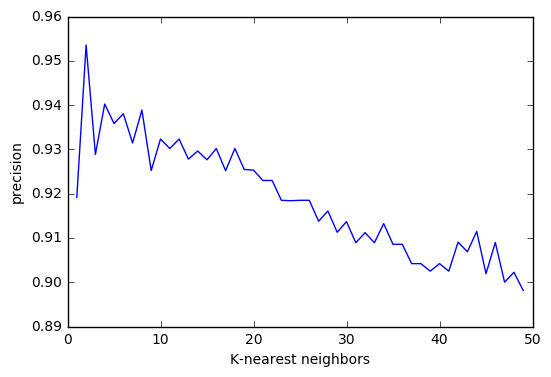

In [50]:
## ejecutar este código al terminar el bloque anterior

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, cv_scores)
plt.ylabel("precision")
plt.xlabel("K-nearest neighbors")